# Subdatasets Meta-Learning Distribution

In [1]:
from os import makedirs
from os.path import join

import pandas as pd

from common import ALIASES, filter_mset, plot_coocc, read_toml

In [2]:
config = read_toml('config.toml')
metachest_dir = config['metachest_dir']
df = pd.read_csv(join(metachest_dir, 'metachest.csv'))

mclasses = {'mtrn': config['mtrn'], 'mval': config['mval'], 'mtst': config['mtst']}
mset_dfs = [filter_mset(mset, mclasses, df)
            for mset in mclasses.keys()]

distro_dir = join(metachest_dir, 'distro')
makedirs(distro_dir, exist_ok=True)

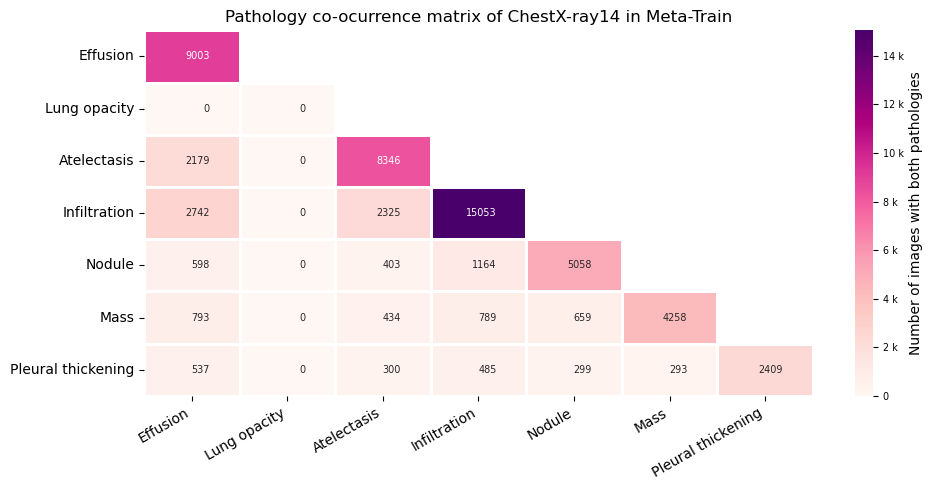

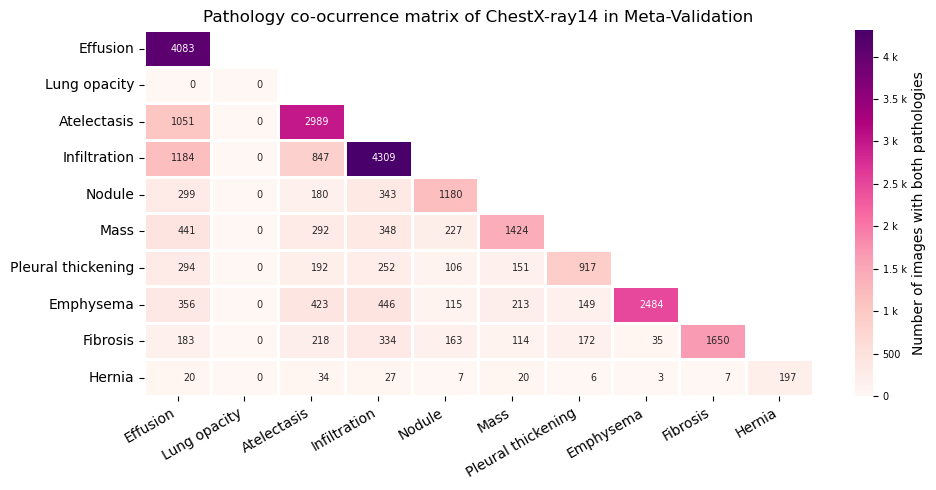

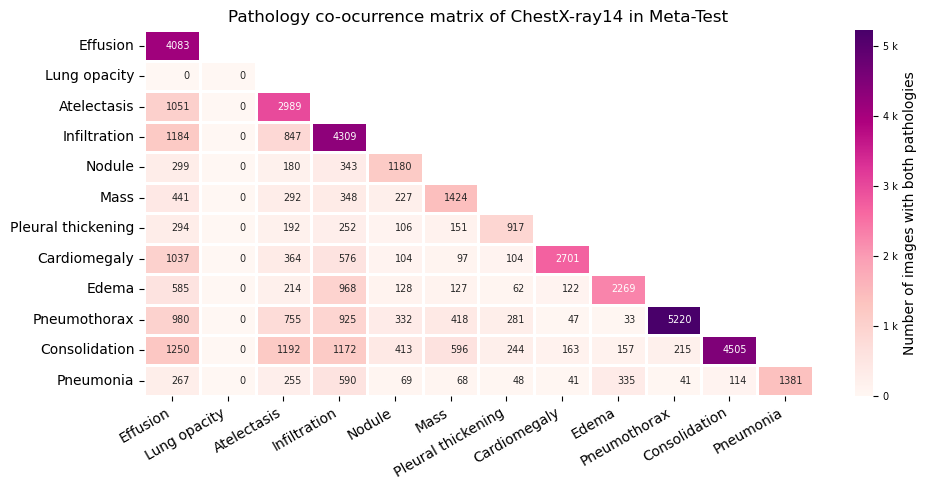

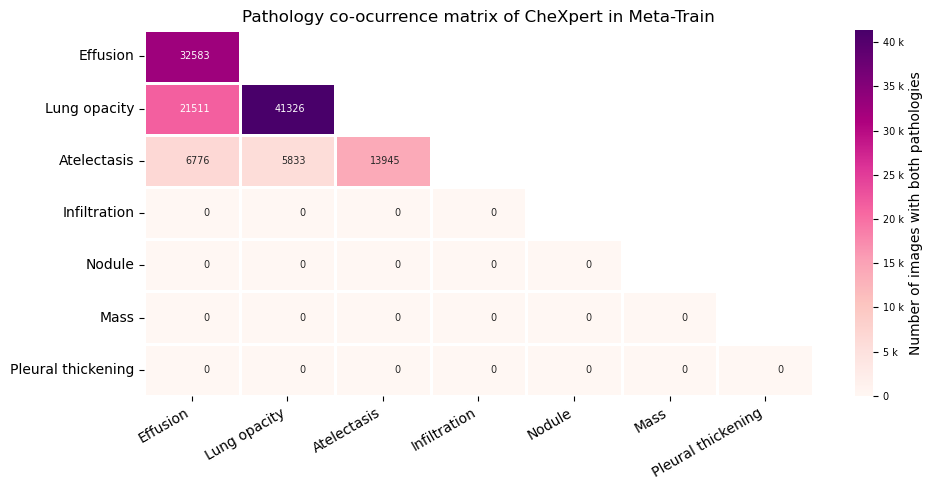

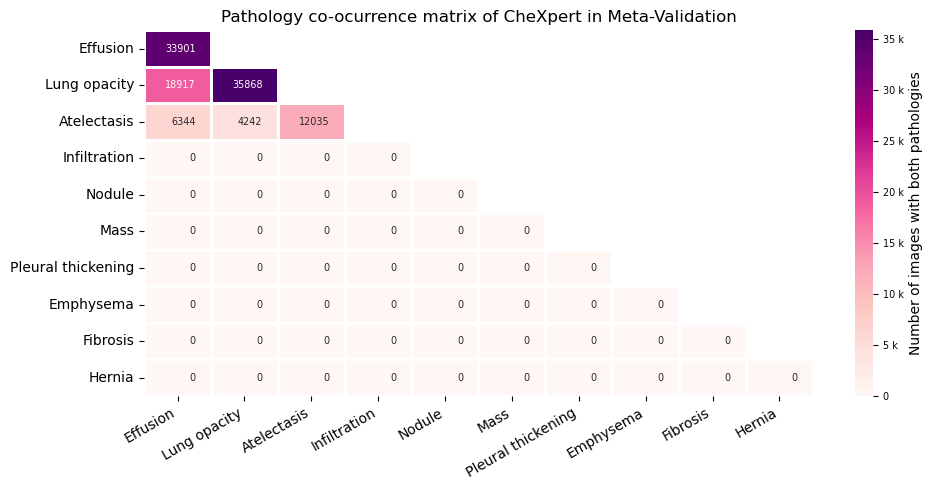

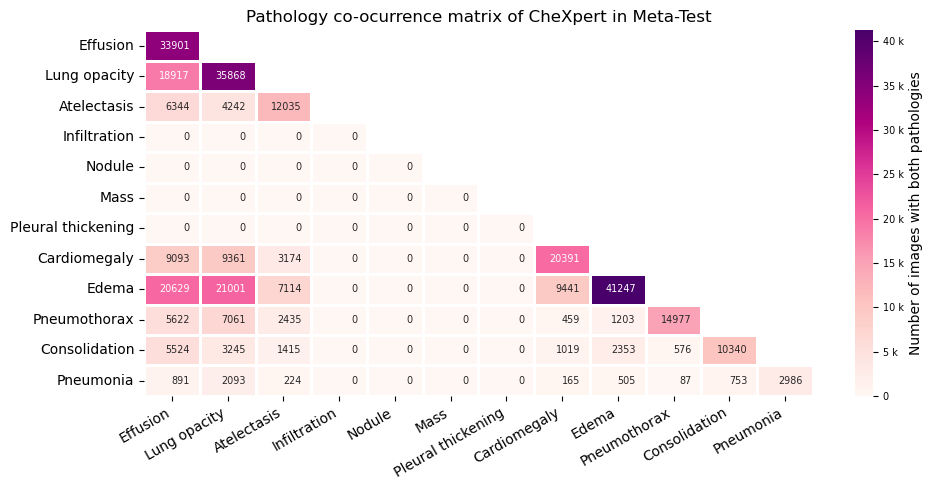

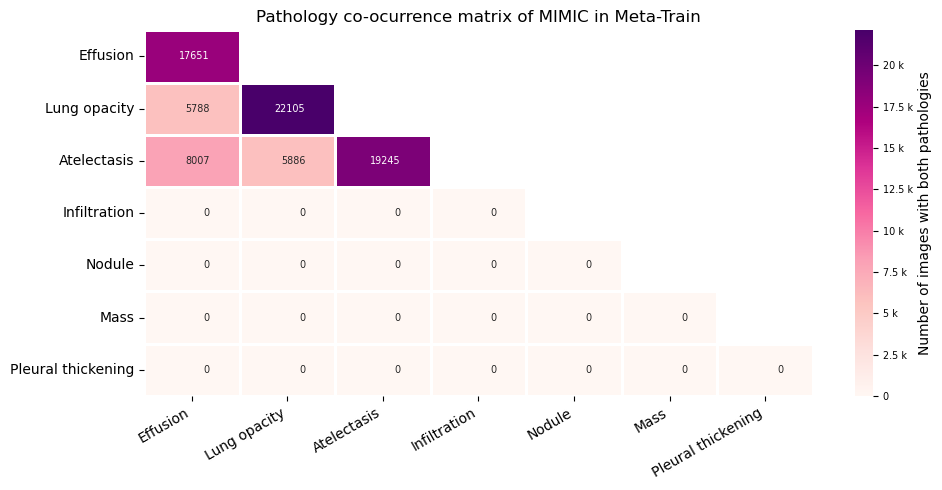

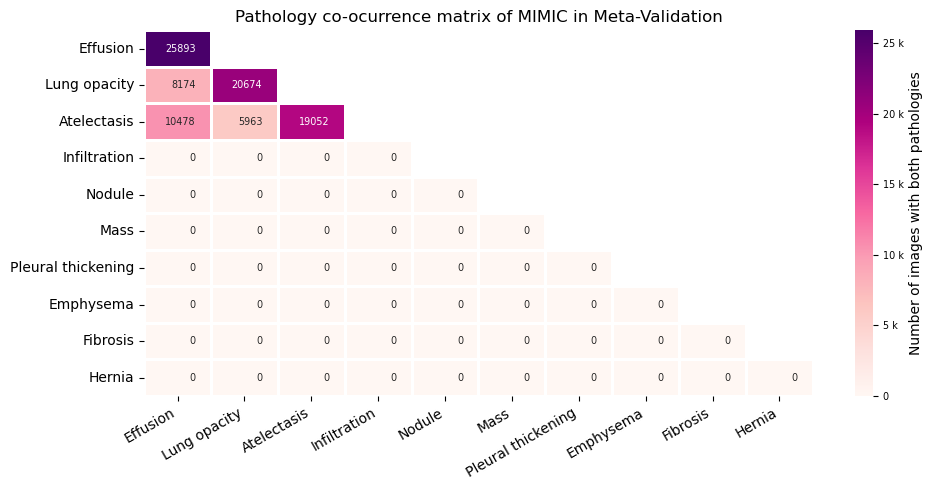

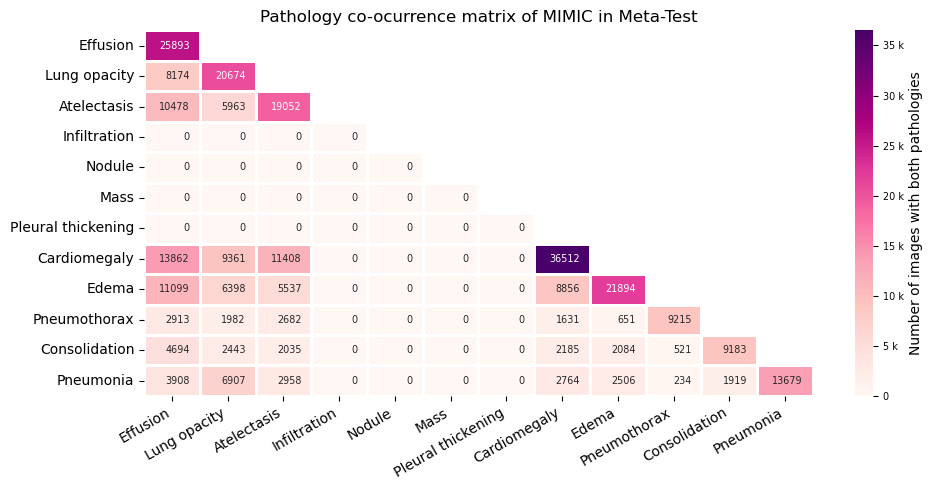

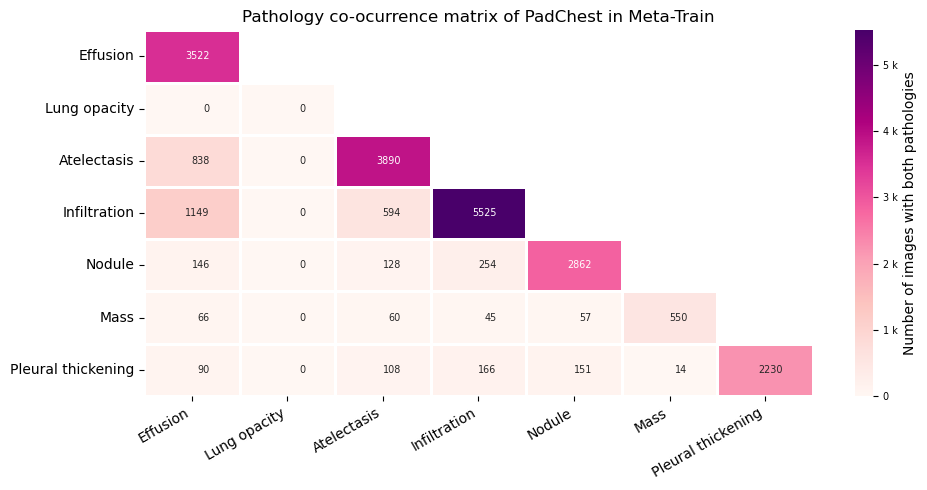

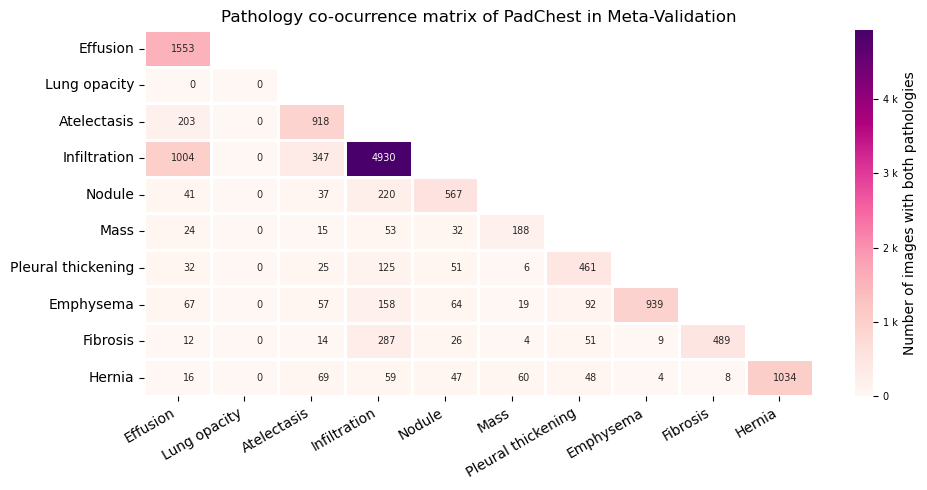

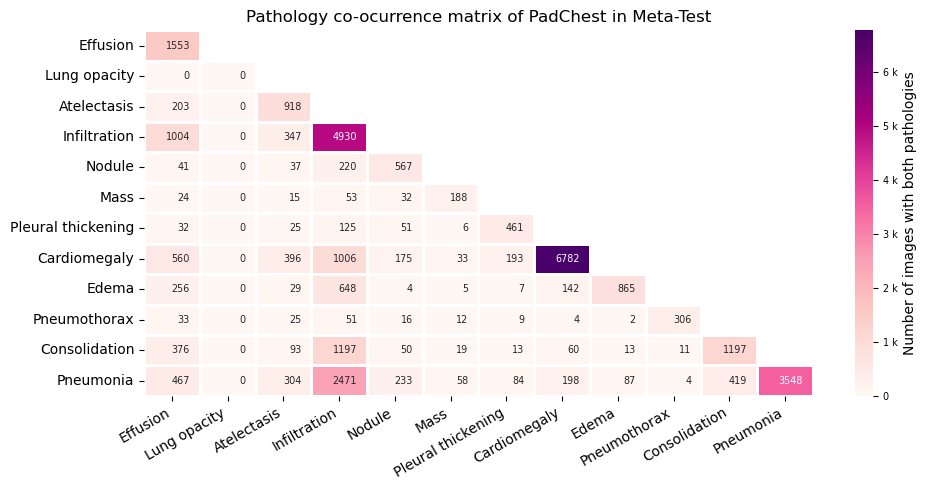

In [3]:
datasets = df['dataset'].unique().tolist()
for dataset in datasets:
    mask = df['dataset'] == dataset
    mask = mask.rename('mask')
    path = join(distro_dir, f'ds_{dataset}.csv')
    mask.astype(int).to_csv(path, index=False)
    dataset_title = ALIASES[dataset]
    for mset, mset_df in zip(mclasses.keys(), mset_dfs):
        ds_mset_df = mset_df.loc[mask]
        plot_coocc(dataset_title, mset, ds_mset_df.iloc[:, 5:])